In [1]:
# suppress tensorflow logging, usually not useful unless you are having problems with tensorflow or accessing gpu
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# globally useful libraries / namespaces for this notebook
import numpy as np
import matplotlib.pyplot as plt

# notebook wide settings for plotting visualizations
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

# Chapter 2: The Mathematical Building Blocks of Neural Networks

Supporting materials for:

Chollet (2021). *Deep Learning with Python*. 2nd ed. Manning Publications Co.
[Amazon](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_1?crid=32NFM2SBCJVQQ)

Understanding deep learning requires familiarity with many simple mathematical
concepts: tensors, tensor operations, differentiation, gradient descent, and so on.
Out goal in this notebook/chapter is to build up your intiution about these mathematical
concepts without getting over technical.

One note about the term tensors.  **Tensor** is a mathematical term that simply can be used to refer
to a matrix of values, no matter how many dimensions.  Thus a 1-dimensional vector or a 2-dimensional
matrix are both *Tensors*, as well as 3-dimensional or higher matrices.  Vectorized programming
could also be referred to as tensor programming, but the term vectorized programming was coined
before the term tensor was in common use.  Another difference is that the term Tensor programming
and Tensor libraries have come to mean the types of vectorized or tensor operations we usually think of, but
it also includes libraries that can automatically differentiate such tensors with respect to
a loss function.  We will get to these concepts in a bit more detail below.



## Note: Installing Keras/TensorFlow

For this textbook we are using the `TensorFlow` library and mostly accessing the `Keras`
neural network and deep learning API through the `TensorFlow`.  You will need to have
a recent version of `Tensorflow/Keras` installed on your machine and available to your
iPython kernel to run this notebook.  At the time of creation of this notebook, 
`TensorFlow/Keras` is no longer supported directly by the `Conda` package manager.  You
should be doing a `pip install` command of `TensorFlow` to correctly get the 
most recent `TensorFlow` libraries with the `Keras` API available:

```
$ python3 -m pip install 'tensorflow'
```

If you have a suitable Nvidia GPU processor available on your your machine, you can get the `cuda` libraries
setup and installed for `TensorFlow` by doing:

```
python3 -m pip install 'tensorflow[and-cuda]'
```

See the official [Install TensorFlow 2](https://www.tensorflow.org/install) for more detailed information about correctly
getting `TensorFlow/Keras` installed on your system. [Install TensorFlow with pip](https://www.tensorflow.org/install/pip) 
has information on installing cuda/Nvidia.


# 2.2 Data Representations for Neural Networks

In general, all current machine-learning systems and libraries use tensors as their basic data structure.
As we mentioned a Numpy `ndarray` which holds an arbitrary n-dimensional array, is also known as a *tensor*.

At its core a tensor is a container for data, all numerical and all of the same type.  So it is a container
for numbers.

## 2.2.1 Scalars (0D tensors)

A tensor that contains only 1 number is called a *scalar*.  You can display the number of axes of a Numpy
tensor via the `ndim` attribute.  A scalar tensor has 0 axes (`ndim == 0`).  The number of axes of a
tensor is also called its rank.

In [2]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


## 2.2.2 Vectors (1D tensors)

A tensor with 1 axis is also called a *vector*.  The rank or number of dimensions is different from the
number of entries.  Unfortunately, and confusingly, in mathematics the following matrix can be referred
to as a 4-dimensional vector.  *Dimensionality* can denote eiather the number of entries along a specific
axis, or the number of axes in a tensor, which can be confusing.  We will try and be careful in this course
to differentiate this, but you will see this usage both ways in different places.

In [3]:
# this is a vector with 1 axis, also called a tensor of rank 1, or a 1D tensor
# but in some contexts it may confusingly also be refered to it as a 4-dimensional vector
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)
print(x.shape)

[12  3  6 14]
1
(4,)


## 2.2.3 Matrices (2D tensors)

Tensors of 2 axes are very common and very useful.  These are commonly referred to as a 2-dimensional
*matrix*.  A matrix has two axes (often thought of as rows and columns).  In our previous machine
learning course, we always have each training and test input as a row, and the features of the
inputs are the columns of the matrix.  In our first network above, after we flattened the training
images into a 2-d matrix, we had 60000 rows of training images, where each image consisted of 784
input pixel features.

In [4]:
# this is a 3 rows by 5 columns 2-d matrix, or 2D tensor
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)
print(x.ndim)
print(x.shape)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2
(3, 5)


## 2.2.4 Rank-3 and Higher-Rank Tensors
If you pack such matrices in a new array, you obtain a 3d tensor, which you can visually interpret
as a cube of numbers.

In [5]:
# a 3D tensor, we have 3 2-D matrices, each 2-D matrix is the previous 3x5 shaped matrix
x = np.array([
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]
             ])
print(x)
print(x.ndim)
print(x.shape)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3
(3, 3, 5)


By packing 3D tensors in an array, you create a 4D tensor, and so on.

## 2.2.5 Key atrributes

A tensor is defined by 3 key attributes:

1. *Number of axes (rank)*
2. *Shape* - A tuple of integers, one for each of the axes of the tensor rank.
3. *Data type*.

For example, we already did this before, but to make this concrete, for the MNIST dataset
the `train_images` is a 3D or rank 3 tensor (before we flattened it).  Its shape is
`(60000, 28, 28)` which translates to 60000 training images, each with 28 rows and 28
columns of pixels.  And again before we transformed it, its data type was `unit8` which
is an unsigned 8 bit integer.

In [6]:
# reload to get back the data before we transformed
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 1. number of axes or rank of the training images tensor
print( train_images.ndim )

# 2. shape of the training images, e.g. number of values for each of the 3 dimensions
print( train_images.shape )

# 3. the data type, before transforming the data is originally 8 bit unsigned integers
print( train_images.dtype )

2025-05-22 20:38:06.367167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747946286.388028   38350 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747946286.394454   38350 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747946286.408758   38350 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747946286.408798   38350 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747946286.408801   38350 computation_placer.cc:177] computation placer alr

3
(60000, 28, 28)
uint8


img_no: 4  label: 9


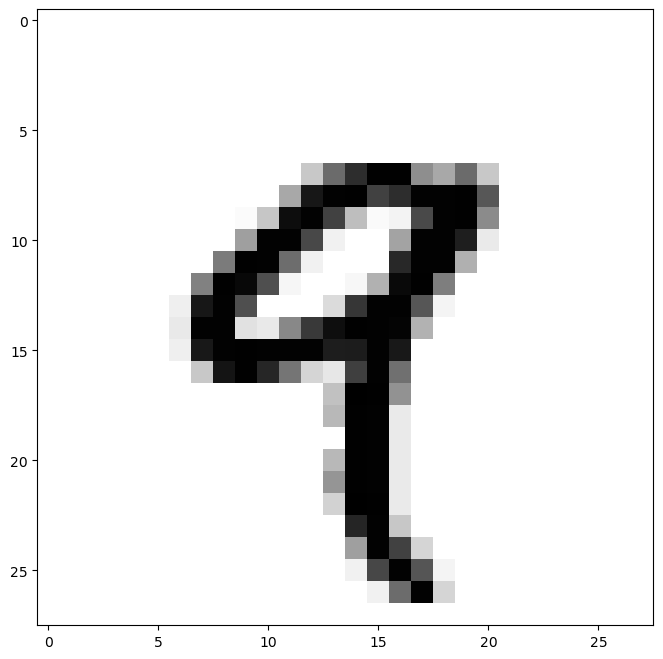

In [7]:
# as we did above, we can manipulate Numpy arrays using slicing.  For example, if we want
# to display the 4th image we can do the following
img_no = 4
print('img_no: %d  label: %d' % (img_no, train_labels[img_no]))

img = train_images[img_no]
plt.imshow(img, cmap=plt.cm.binary);

## 2.2.6 Manipulating Tensors in Numpy

In the previous cells notice that we didn't specify the slice for all 3 dimensions.  It is assumed that if you don't
specify slices on a dimension, you want all values for that dimension.  Thus in the previous example, we got
the $28 \times 28$ pixels for training image number 4.

If we want to select a batch of images, we can use the same idea/trick in Python.  For example, to get
images 10 through 100 (up to but not including image 100) we slice like this

In [8]:
my_slice = train_images[10:100]
print( my_slice.shape )

# equivalent to what we did before
my_slice = train_images[10:100, :, :]
print( my_slice.shape )


# also equivalent to being explicit for each dimension
my_slice = train_images[10:100, 0:28, 0:28]
print( my_slice.shape )


(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


This type of array slicing in Python is very powerful.  Make sure you are comfortable with it and how to
use it and how it work.  For example, as shown in the book, if we want the pixels in the bottom right of
the images, we can do something like:

(14, 14)


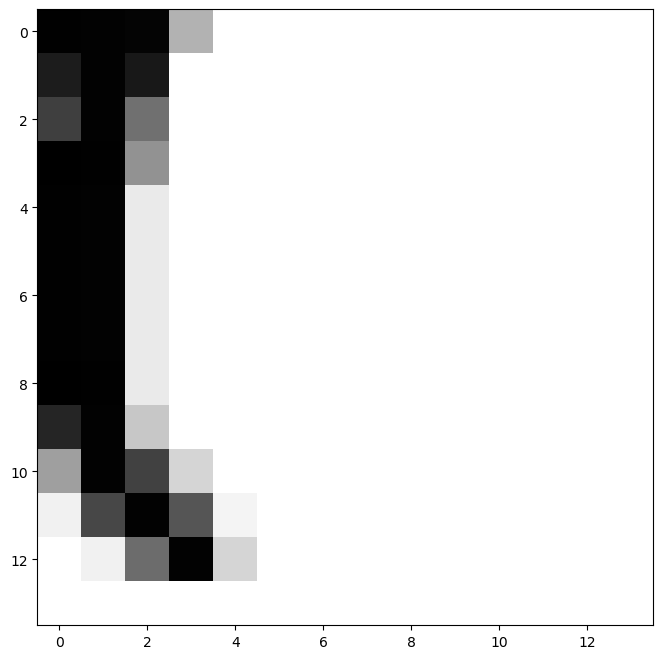

In [9]:
# different from text example, get only bottom right of image 4
img = train_images[4, 14:, 14:]
print( img.shape )
plt.imshow(img, cmap=plt.cm.binary);

(14, 14)


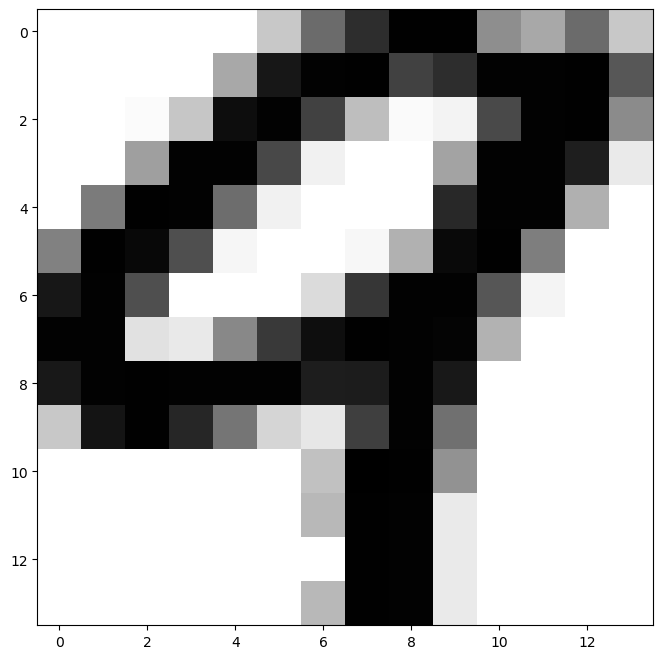

In [10]:
# same idea, but extract the middle 14x14 pixels of the image
img = train_images[4, 7:-7, 7:-7]
print( img.shape )
plt.imshow(img, cmap=plt.cm.binary);

## 2.2.7 The Notion of Data Batches

By convention, the first axis (axis 0) in all data tensors for machine learning will usally be the
*samples axis* (sometimes called the *samples dimension*).  When doing batch training, we might also
refer to this axis as the *batch dimension*.

For batch learning, we train a model or network in batches.  Thus, like we did above, if we want to
get a batch of the first 128 images we can do the following.  

In [11]:
batch = train_images[:128]
print( batch.shape )

(128, 28, 28)


Likewise we can get the next batch.  And we can get any arbitrary nth batch.

In [12]:
# 2nd batch
batch = train_images[128:256]
print( batch.shape )

# nth batch
n = 5
batch = train_images[128 * n : 128 * (n + 1)]
print( batch.shape )
print( 128 * n, 128 * (n + 1) )

(128, 28, 28)
(128, 28, 28)
640 768


## 2.2.8 Real-World Examples of Data Tensors

We will see examples of different types of data tensors in this class.  The data you'll manipulate will almost always fall
into one of the following categories:

- *vector data* - Rank-2 tensors of shape `(samples, features)`, where each sample is a vector of numerical attributes ("features")
- *timeseries data* or *sequence data* - Rank-3 tensors of shape `(samples, timesteps, features)`, where each sample is a
  sequence (of length `timesteps`) of feature vectors.
- *images* - Rank-4 tensors of shape `(samples, height, width, channels)`, where each sample is a 2D grid of pixels, and each pixel
  is represented by a vector of values ("channels")
- *video* - Rank-5 tensors of shape `(samples, frames, height, widht, channels)`, where each sample is a sequence (of length `frames`)
  of images

In the following discussions, we will try and use some of the example datasets from the [Keras 3 API Datasets](https://keras.io/api/datasets/).

## 2.2.9 Vector Data

The most common case.  Each single sample can be encoded as a vector of measured features, thus a batch
of data will be encoded as a rank-2 tensor, where the first axis is the *samples axis* and the second
axis is the *features axis*.

For example, the [California Housing](https://keras.io/api/datasets/california_housing/) dataset has
20,640 samples where each sample has 8 different features of housing data for a county or
political entity in California. 

In [13]:
from tensorflow.keras.datasets import california_housing
(x_train, y_train), (x_test, y_test) = california_housing.load_data()

print(x_train.shape)
print(x_test.shape)

(16512, 8)
(4128, 8)


So you should notice that the train and tests data each of 8 features in the second dimension.  The 20,640
samples are split by default using an 80/20 percent train/test split, thus the total samples
available is 16512 + 4128 = 20640.  The samples collected for sample 0 for the training data are:

In [14]:
x_train[0]

array([-118.27  ,   34.09  ,   52.    , 2327.    ,  555.    , 1048.    ,
        491.    ,    3.7847], dtype=float32)

## 2.2.10 Timeseries Data or Sequence Data

Whenever time matters in the data it makes sense to store as a rank-3 tensor of shape `(samples, timesteps, features)`
with an explicit time axis. For example a dataset of stock prices or tweets might need to be structured
as time series data.  For example, if the california housing dataset had collected samples each year from
1910 through 1990, we could represent this as a time series, where the `timesteps` would then correspond to the
year collected, e.g. timestep 0 could be for year 1910, timestep 1 for 1911, etc.

**TODO**: There isn't a timeseries dataset in the small tf/keras datasets, so maybe find another source here.

## 2.2.11 Image Data

Images typically have 3 dimensions: height, width and color depth.  The MNIST digits we used before are image data, but they
are greyscale images with only 1 color channel, thus they don't quite fit pattern of a Rank-4 tensor of shape
`(samples, height, width, channels)`.

For example, the `cifar10` dataset is a dataset of 50,0000 sample training images and 10,000 test imagesof shape 32x32 pixels.
These are color images with 3 color channels, RGB (red, green and blue pixel intensities).

In [15]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


So if we want to display one of these sampled color images, we can extract and display in a similar way
as we did with the MNIST greyscale images.

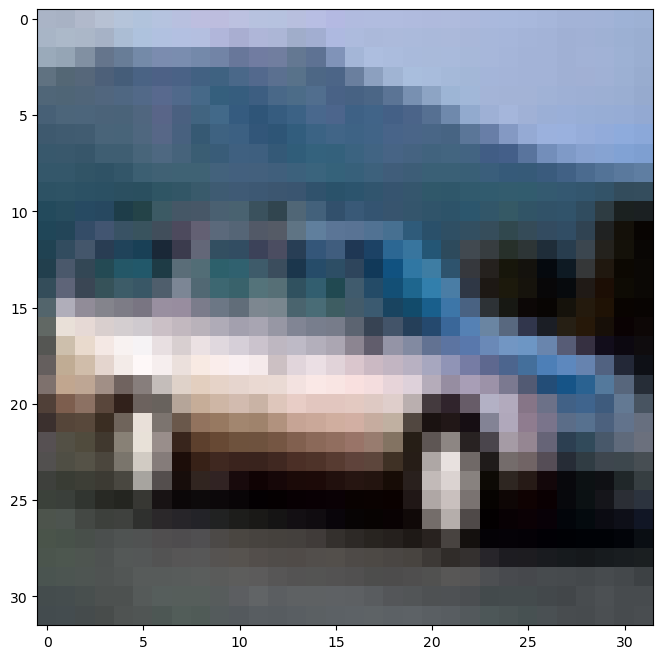

In [16]:
# as we did above, we can manipulate Numpy arrays using slicing.  For example, if we want
# to display the 4th image we can do the following
img_no = 4

img = x_train[img_no]
plt.imshow(img);

## 2.2.12 Video Data

Video data needs a rank-5 tensor because in the form we usually use for deep learning training, it is basically
represented as a timeseries of color images.  So if you followed the previous discussions about timeseries data
and color image data, you can see we need to add in a `timestamp` or `framenum` dimension, e.g. as
we mentioned before the rank-5 tensor has a shape of `(samples, frames, height, width, channels)`.

For instance, a 60-second, 144x256 YouTube video clip sampled at 30 frames per second would need 1800 frames.
A batch of four such sampled video clips would be stored in a tensor of shape 
`(4, 1800, 144, 256, 3)`.  Thats a total of 796,262,400 values.  If we use a full `float32` for each pixel
RGB value, the tensor would need 3 GB to hold these 4 video samples.  Videos you encounter in real life
are much lighter, because they aren't stored in `float32`, and they're typically compressed by a large
factor (such as in the MPEG format).